# Student's behaviors data Exploration
### by Ahmed Alaa Mousa

## Preliminary Wrangling


This document explores some features of the PISA dataset regarding student behaviors.


PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics, and science representing about 28 million 15-year-olds globally.

I selected some features related to family status, Teacher support, student view of school and attitudes to failer.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

Due to the large size of the PISA dataset, I selected columns of interests and rename them before starting my explorations phase

In [2]:
df = pd.read_csv('selected_columns_from_pisa.csv')
df.head(2)

,age,country,gender,mother,father,brothers,sisters,father_wk_st,mother_wk_st,teacher_not_explaining_well,bad_guesses,teacher_didnt_get_students_interested,unlucky,outsider,awkward,lonely,satisfied_at_school,teacher_support,math_wk_ethic
0,16.17,Albania,Female,Yes,Yes,Yes,Yes,Working part-time <for pay>,"Other (e.g. home duties, retired)",Slightly likely,Likely,Likely,Very Likely,Agree,Strongly agree,Strongly disagree,Agree,1.68,0.2882
1,16.17,Albania,Female,Yes,Yes,NaN,Yes,Working full-time <for pay>,Working full-time <for pay>,Slightly likely,Slightly likely,Slightly likely,Likely,NaN,NaN,NaN,NaN,NaN,0.6490


In [3]:
df.shape

(485490, 19)

In [4]:
df.describe()

,age,teacher_support,math_wk_ethic
count,485374.000000,316371.000000,314501.000000
mean,15.784283,0.152789,0.135775
std,0.290221,0.995688,1.009700
min,15.170000,-2.920000,-3.450300
25%,15.580000,-0.470000,-0.401700
50%,15.750000,0.110000,0.109900
75%,16.000000,0.970000,0.649000
max,16.330000,1.680000,2.716700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 19 columns):
age                                      485374 non-null float64
country                                  485490 non-null object
gender                                   485490 non-null object
mother                                   460559 non-null object
father                                   441036 non-null object
brothers                                 400076 non-null object
sisters                                  390768 non-null object
father_wk_st                             451410 non-null object
mother_wk_st                             467751 non-null object
teacher_not_explaining_well              313405 non-null object
bad_guesses                              312645 non-null object
teacher_didnt_get_students_interested    312970 non-null object
unlucky                                  313374 non-null object
outsider                                 311776 non-null

there is too much null data in each column, dropping them might make a very small data to analyze 

## Univariate Exploration

c:\users\ahmed\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ahmed\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


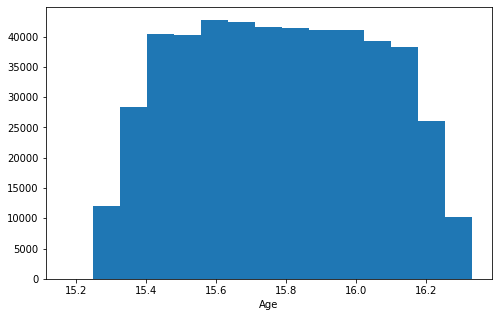

In [6]:
binsize = 15

plt.figure(figsize=[8, 5])
plt.hist(data=df, x='age',bins=binsize)
plt.xlabel('Age');

* All students almost the same age, on avarage 15.8 with no outliers 
* I think we can drop the age for this analysis

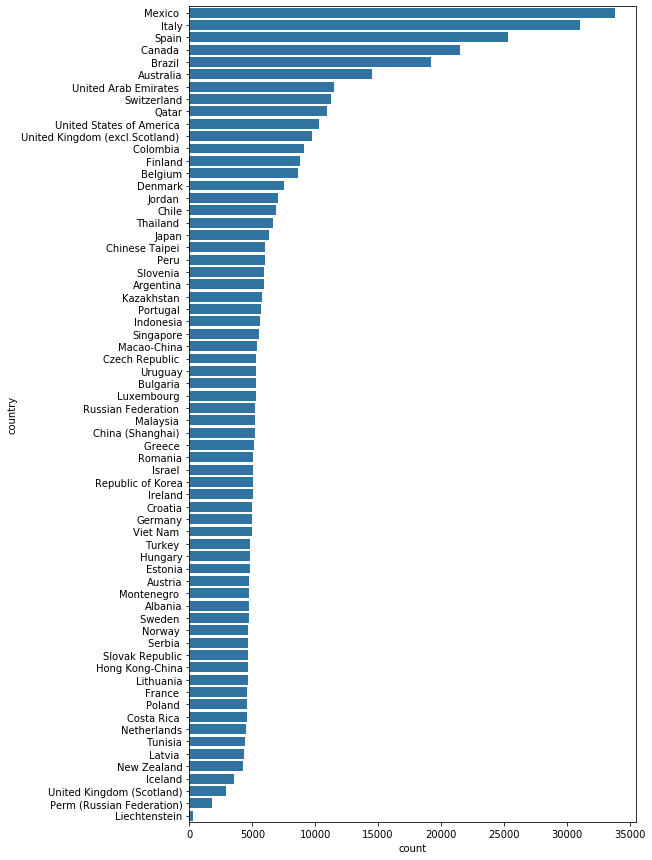

In [7]:
order = df['country'].value_counts().index
color = sb.color_palette()[0]

plt.figure(figsize=[8, 15])
sb.countplot(data=df, y='country', order=order, color=color);

* Here we can see that the survay applied equally for each country except the first seven countries, that may indicate a biased conclusion for Mexico for example as it contains seven times the data of a regular country
* liechtenstein has the least participation in the survay
* I will not use the country feature as it looked not interesting to my analysis

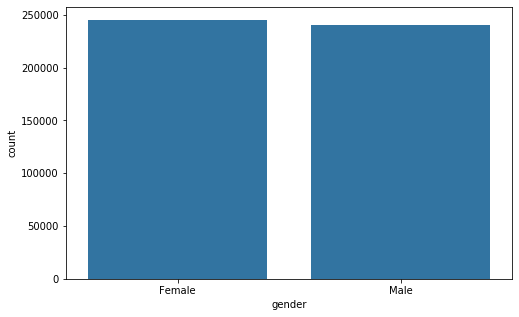

In [8]:
color = sb.color_palette()[0]

sorted_counts = df['gender'].value_counts()

plt.figure(figsize=[8, 5])
sb.countplot(data=df, x='gender', color=color);

* equal gender selection, that may help in looking for different gender behaviors

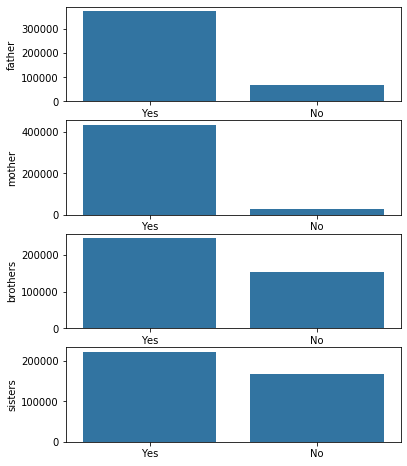

In [9]:
family = ['father', 'mother', 'brothers', 'sisters']

fig, ax = plt.subplots(nrows=4, figsize = [6,8])
for index, person in enumerate(family): 
    sb.countplot(data = df, x = person, color = color, ax = ax[index])
    ax[index].set_ylabel(person);
    ax[index].set_xlabel('');

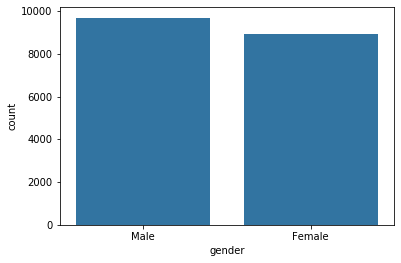

In [10]:
sb.countplot(data = df[(df['mother'] == 'No') & (df['father']=='No')], x='gender', color = color)

* as expected the absence of fathers are more likely than mothers
    - we may analyze father absence affect on student behaviors

In [11]:
f_work_order = ['Working full-time <for pay> ', 'Working part-time <for pay>', 'Not working, but looking for a job', 'Other (e.g. home duties, retired) ']
m_work_order = ['Working full-time <for pay> ', 'Working part-time <for pay>', 'Not working, but looking for a job ', 'Other (e.g. home duties, retired) ']

df['father_wk_st'] = df['father_wk_st'].astype(pd.api.types.CategoricalDtype(ordered = True,categories = f_work_order))
df['mother_wk_st'] = df['mother_wk_st'].astype(pd.api.types.CategoricalDtype(ordered = True,categories = m_work_order))

* note in the data set they have different typing for the 'Not working, but ...'  so I didn't loop on it

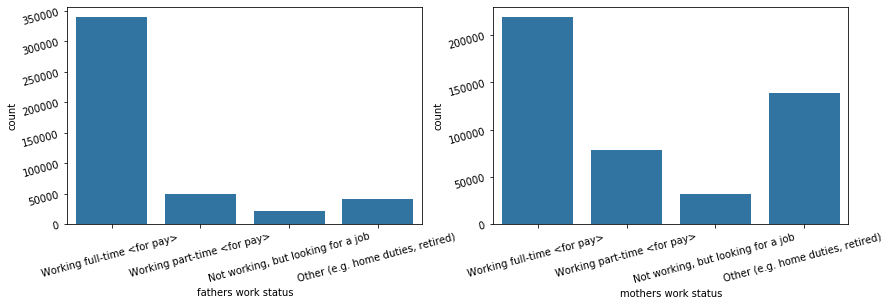

In [12]:
fig, ax = plt.subplots(ncols=2, figsize = [14,4])

sb.countplot(data = df, x = 'father_wk_st', color = color, ax = ax[0])
sb.countplot(data = df, x = 'mother_wk_st', color = color, ax = ax[1])
ax[0].tick_params(labelrotation=15)
ax[1].tick_params(labelrotation=15)
ax[0].set_xlabel('fathers work status');
ax[1].set_xlabel('mothers work status');

* most of the fathers appear to have a full-time job
* while a good portion of the mothers have a full-time job too, many more in the other category or the working part-time
    - we can use that as a working vs not working mothers comparison with other features

In [13]:
failure_attitudes = ['teacher_not_explaining_well', 'teacher_didnt_get_students_interested', 'bad_guesses', 'unlucky']
likely_orders = ['Very   Likely', 'Likely', 'Slightly likely', 'Not at all likely']

for feature in failure_attitudes,:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = likely_orders)
    df[feature] = df[feature].astype(ordered_var)

In [14]:
def plot_multiple(figsize, plotting_list, nrows=1, ncols=1, labelrotation=0):
    """
    plot multiple plots that share almost the 
    same variable:
    - figsize (list): size of full figure
    - nrows (int): number of rows
    - ncols (int): number of columns
    - plotting_list (list): list of df columns
    - labelrotation (int): rotation of axis labels
    """
    fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=figsize)

    for index, attitude in enumerate(plotting_list): 
        sb.countplot(data = df, x = attitude, color = color, ax = ax[index])
        ax[index].set_xlabel('')
        ax[index].set_ylabel('')
        ax[index].tick_params(labelrotation=labelrotation)
        ax[index].set_title(attitude);

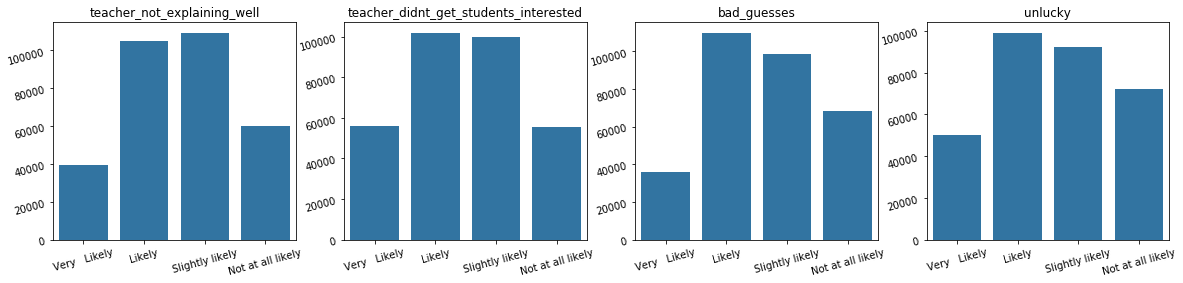

In [15]:
plot_multiple([20,4], failure_attitudes, ncols=4, labelrotation=15)

* teacher not explaining well and teacher didnt get students interseted has similar shape
* unlucky and bad guesses also has similar shape
* bad_guesses is slightly skewed to the left 
* teachers that don't get students interests are higher in Very likely and likely columns
<br><br>
* we can later change these columns into a single score from -2 to 2, mapping each value to a score and then sum all values

In [16]:
belonging_features = ['outsider', 'awkward', 'lonely', 'satisfied_at_school']
agree_orders = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree' ]

for feature in belonging_features,:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = agree_orders)
    df[feature] = df[feature].astype(ordered_var)

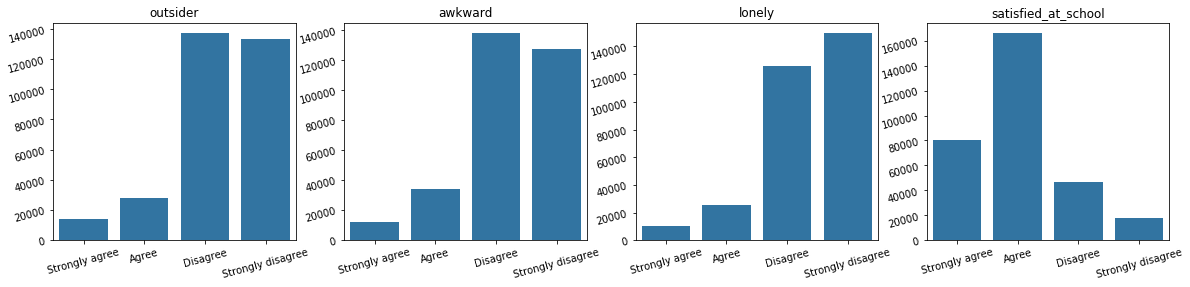

In [17]:
plot_multiple([20,4], belonging_features, ncols=4, labelrotation=15)

Those are 4 of our response parameters for this analysis, I will compare those with other things like gender teacher_support and family conditions.
<br><br>
Regarding outsider, awkward, and lonely:
* most of the student tends to disagree with those feelings in school, with furthermore investigation we can look at who is more receivable of those feelings
<br>

Regarding satisfaction at school:
* it looks skewed to the right with a tall peak in the Agree choice, also we can compare that with other things

c:\users\ahmed\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ahmed\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


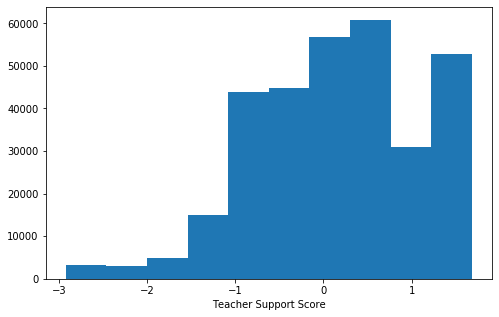

In [18]:
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='teacher_support')
plt.xlabel('Teacher Support Score');

* weird distribution of the Teacher support scores, there is a drop in the 1 score and most values tend to be around 0
* We can use this as a response feature to check if teacher support affect the students saying he didn't give him support when failing

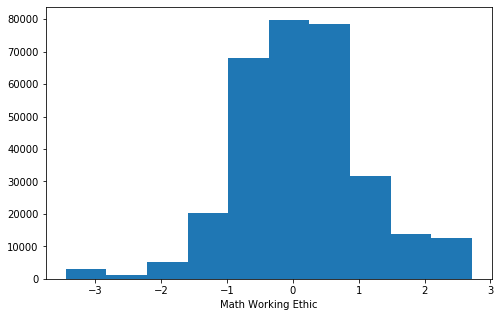

In [19]:
plt.figure(figsize=[8, 5])
plt.hist(data=df, x='math_wk_ethic')
plt.xlabel('Math Working Ethic');

* Math working Ethics is normally distributed
* we can represent this feature as student ethics overall, and then we can check it with other features like if a student considers failing in an exam was unlucky or bad guesses are he/she has bad ethics. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the data are categorical, except for a few of them, I may consider changing some of those categories into scores ranging from (-2 to 2) for easy investigation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I didn't have to change much, just ordered some features in the dataset for better visualization

<hr>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Feature engineering
lets first change some of our columns to numeric scores and add relevent/related featuers into one column

In [20]:
agree_scores = [2, 1, -1, -2]
likely_scores = [3, 2, 1, -2]

agree_orders_numeric = {agree_orders[i]: agree_scores[i] for i in range(len(agree_orders))} 
likely_orderss_numeric = {likely_orders[i]: likely_scores[i] for i in range(len(likely_orders))} 

print(agree_orders_numeric)
print(likely_orderss_numeric)

{'Strongly agree': 2, 'Agree': 1, 'Disagree': -1, 'Strongly disagree': -2}
{'Very   Likely': 3, 'Likely': 2, 'Slightly likely': 1, 'Not at all likely': -2}


Here for the likely scores, I think this is better like that than 2 1 -1 -2, though it is my personal opinion

In [21]:
for feature in failure_attitudes:
    df[feature+'_n'] = df[feature].map(likely_orderss_numeric)
    
for feature in belonging_features:
    df[feature+'_n'] = df[feature].map(agree_orders_numeric)

In [22]:
df['socially_bad_feelings'] = df['awkward_n'].astype('float') + df['outsider_n'].astype('float') + df['lonely_n'].astype('float')
df['irresponsible_thinking'] = df['bad_guesses_n'].astype('float') + df['unlucky_n'].astype('float')
df['teachers_fault_thinking'] = df['teacher_not_explaining_well_n'].astype('float') + df['teacher_didnt_get_students_interested_n'].astype('float')
df['satisfied_at_school_n'] = df['satisfied_at_school_n'].astype('float')

In [23]:
df = df.drop(['teacher_not_explaining_well_n',
         'teacher_didnt_get_students_interested_n',
         'bad_guesses_n',
         'unlucky_n',
         'outsider_n', 
         'awkward_n', 
         'lonely_n']
        , axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
age                                      485374 non-null float64
country                                  485490 non-null object
gender                                   485490 non-null object
mother                                   460559 non-null object
father                                   441036 non-null object
brothers                                 400076 non-null object
sisters                                  390768 non-null object
father_wk_st                             451410 non-null category
mother_wk_st                             467751 non-null category
teacher_not_explaining_well              313405 non-null category
bad_guesses                              312645 non-null category
teacher_didnt_get_students_interested    312970 non-null category
unlucky                                  313374 non-null category
outsider                                 311

lets first plot each of our new values as a univariate plot

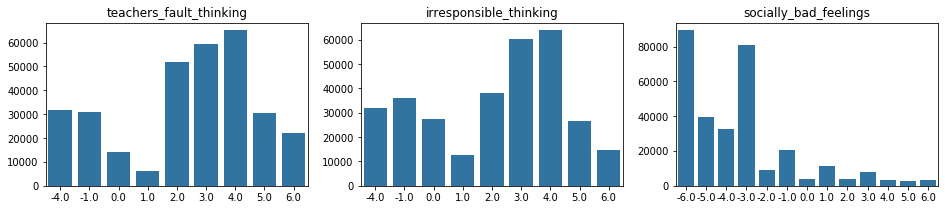

In [25]:
new_features = ['teachers_fault_thinking','irresponsible_thinking', 'socially_bad_feelings']

plot_multiple([16,3], new_features, ncols=3)

* teachers fault and irresponsible thinking have bimodel distribution maybe its because of my selection of the scores
* socially bad feelings (lonely, awkward, and outsider) have a log distribution as expected with most of the student don't agree with those feelings

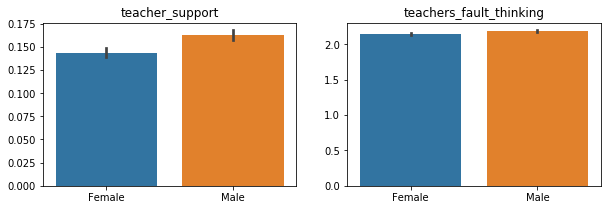

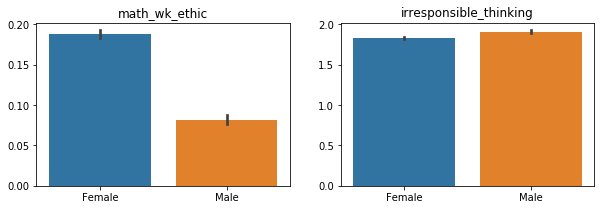

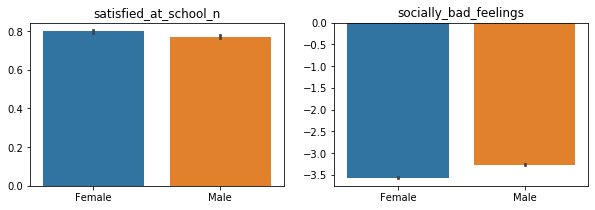

In [26]:
against_gender_pair = [['teacher_support', 'teachers_fault_thinking'],
                       ['math_wk_ethic', 'irresponsible_thinking'],
                       ['satisfied_at_school_n', 'socially_bad_feelings']]


for against_gender in against_gender_pair:
    fig, ax = plt.subplots(ncols=2, figsize = [10,3])
    for index, attitude in enumerate(against_gender):
        sb.barplot(data=df, x='gender', y=attitude, ax = ax[index])
        ax[index].set_xlabel('');
        ax[index].set_ylabel('');
        ax[index].set_title(attitude);

### Teacher effect on student
* As we can see that there are not many differences between boys vs girls
* boys have slightly more support from teachers than girls
* its looks similar for boys and girls to think its the teacher's fault

### Responsibility 
* girls tend to be more responsible than boys (doing hw well)
* its looks similar for boys and girls to think irresponsibly 

### Socializing and Satisfaction
* both of these plots look the same for both boys and girls.

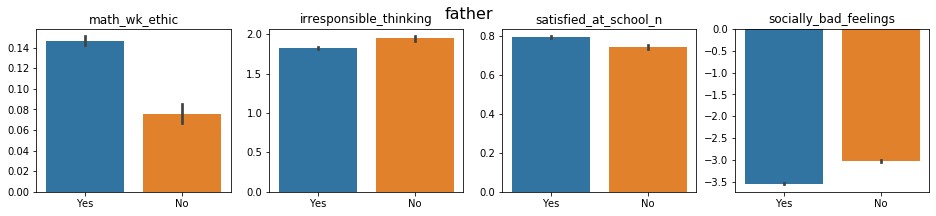

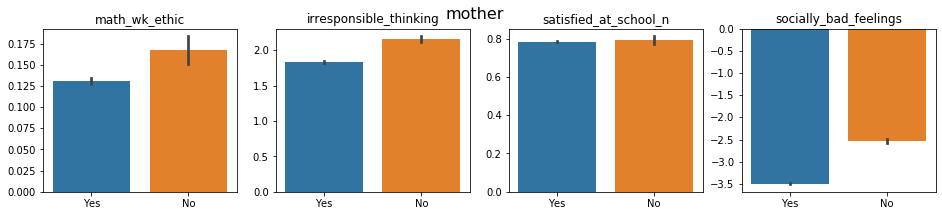

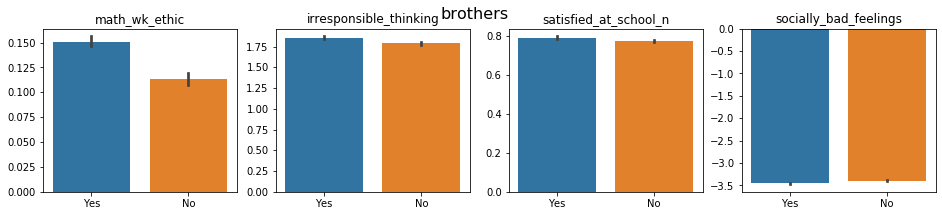

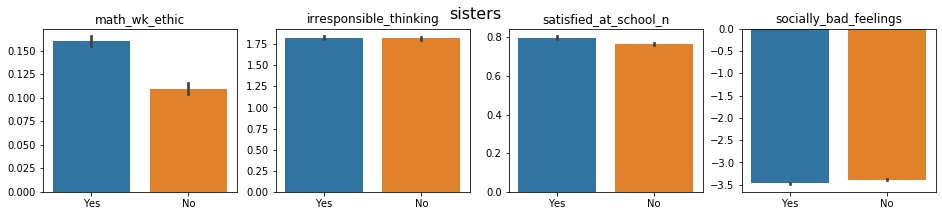

In [27]:
against_family = ['math_wk_ethic',
                  'irresponsible_thinking',
                  'satisfied_at_school_n',
                  'socially_bad_feelings']
family 

for family_member in family:
    fig, ax = plt.subplots(ncols=4, figsize = [16,3])
    for index, attitude in enumerate(against_family):
        sb.barplot(data=df, x=family_member, y=attitude, ax = ax[index])
        ax[index].set_xlabel('');
        ax[index].set_ylabel('');
        ax[index].set_title(attitude);
    fig.suptitle(family_member, fontsize=16)

### School Satisfaction
* Let's start with this, it looks like family does not affect school satisfaction at all.

### Socializing
* Sisters and brothers do not affect the social state of the students, maybe we can check the absence of both for more info
* Bad social feeling happens more when father or mother is not there but the bigger effect from mother's absence 

### Work ethic
* If the student has a brother or a sister they will do more than if they didn't, we can check there is no brothers or sisters at all, and what will that affect the student ethics
* father have the same effect as brothers and sisters with slightly fewer ethics if he is not there
* on the other hand, there is an unusual increase in work ethics with the absence of mothers, do children become more responsible if their mother not there to help them? 

### Irresponsibility
* like the work ethic it's the same for brothers, sisters, and fathers with slight differences here and there but not much to consider.
* Mother's absence on the other hand made the students more likely to think irresponsible, although they have more work ethics. 

In [28]:
conditions = [
    (df['brothers'] == 'Yes') & (df['sisters'] == 'Yes'),
    (df['brothers'] == 'Yes'),
    (df['sisters'] == 'Yes'),
    (df['brothers'] == 'No') & (df['sisters'] == 'No')]
choices = ['both', 'brothers', 'sisters', 'no']
df['siblings'] = np.select(conditions, choices, default=None)

In [29]:
df[['gender','brothers', 'sisters', 'siblings']].head(10)

,gender,brothers,sisters,siblings
0,Female,Yes,Yes,both
1,Female,NaN,Yes,sisters
2,Female,No,Yes,sisters
3,Female,No,Yes,sisters
4,Female,Yes,NaN,brothers
5,Female,No,Yes,sisters
6,Female,Yes,No,brothers
7,Male,No,Yes,sisters
8,Female,NaN,NaN,None
9,Female,Yes,No,brothers


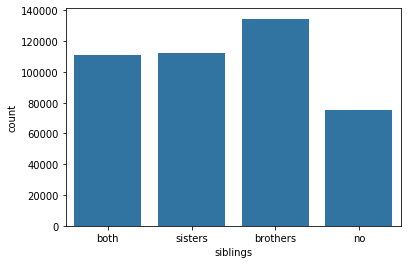

In [30]:
sb.countplot(data=df, x='siblings', color=color);

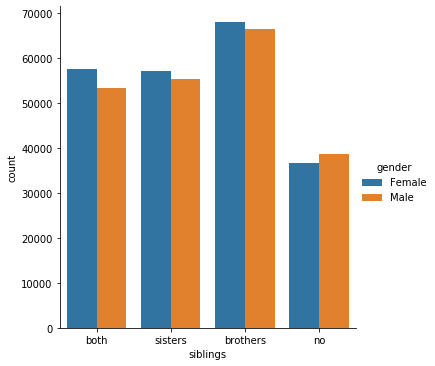

In [31]:
sb.catplot(data=df, x="siblings", hue='gender', kind="count")

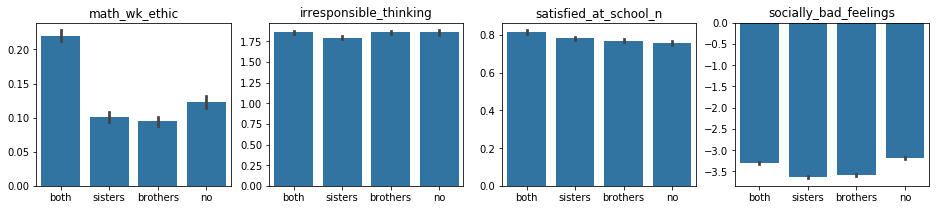

In [32]:
fig, ax = plt.subplots(ncols=4, figsize = [16,3])
for index, attitude in enumerate(against_family):
    sb.barplot(data=df, x='siblings', y=attitude, ax = ax[index],color=color)
    ax[index].set_xlabel('');
    ax[index].set_ylabel('');
    ax[index].set_title(attitude);

having both types of siblings made the math work ethic increases more than one type or no brothers or sisters at all, which is interesting

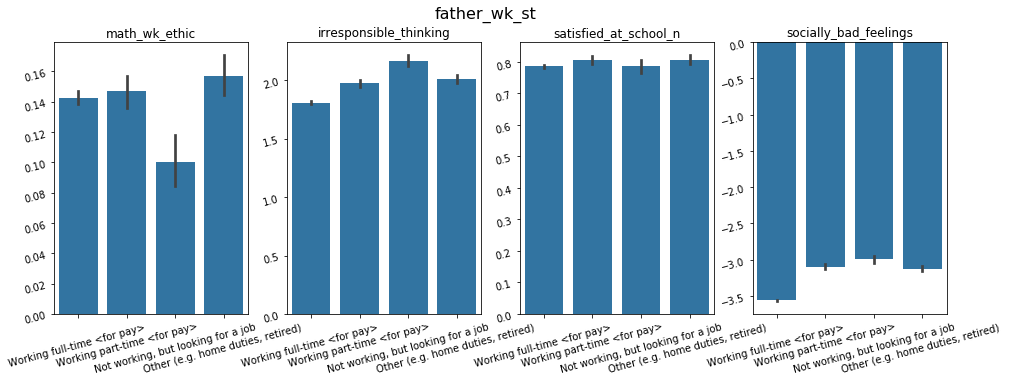

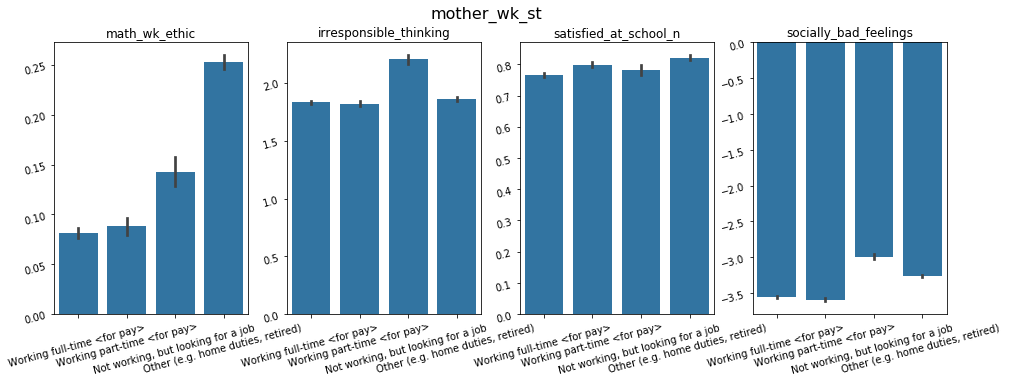

In [33]:
against_family = ['math_wk_ethic',
                  'irresponsible_thinking',
                  'satisfied_at_school_n',
                  'socially_bad_feelings']

works_status = ['father_wk_st','mother_wk_st']

for family_member in works_status:
    fig, ax = plt.subplots(ncols=4, figsize = [16,5])
    for index, attitude in enumerate(against_family):
        sb.barplot(data=df, x=family_member, y=attitude, ax = ax[index], color=color)
        ax[index].set_xlabel('');
        ax[index].set_ylabel('');
        ax[index].set_title(attitude);
        ax[index].tick_params(labelrotation=15)

    fig.suptitle(family_member, fontsize=16)

we may consider this as an ordinal category

### School Satisfaction
* As usual, it looks like work status does not affect school satisfaction.

### Socializing
* for both mother and father, it appears so little that the less work the more social student will feel but very little though

### Work ethic
* a noticable drop in work ethics due to father looking for a job
* very interesting exponential curve of mother's less working made the students have more ethics(study more)

### Irresponsibility
* for the father work status looks like a normal distribution. nothing interesting.
* for the mother work status it is a uniform distribution with a peak at looking for a job, maybe the act of searching for a job made the mothers careless and the students more irresponsible  

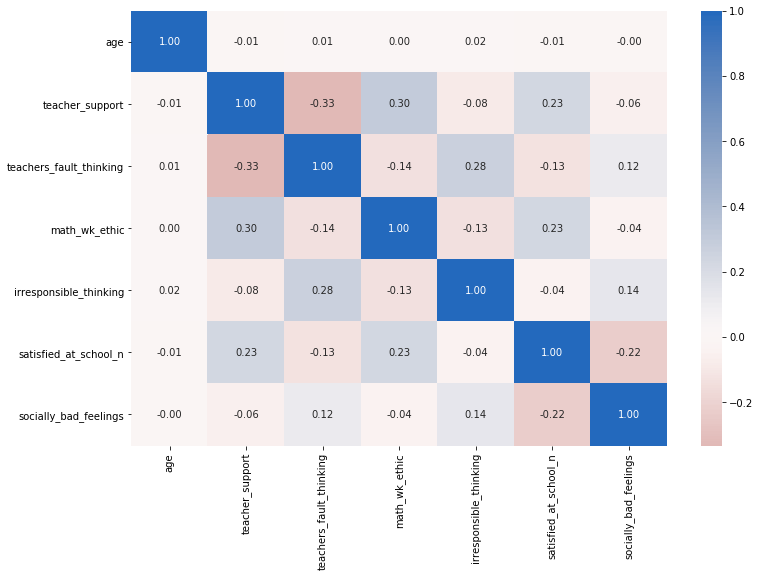

In [34]:
numeric_values = ['age',
                  'teacher_support', 
                  'teachers_fault_thinking',
                  'math_wk_ethic', 
                  'irresponsible_thinking',
                  'satisfied_at_school_n',
                  'socially_bad_feelings']

plt.figure(figsize = [12, 8])
sb.heatmap(df[numeric_values].corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0);

### Correlation matrix

* Age does not correlate with any of our interested features at all.
* All of the values has low correlation, but we can check the high three relations:
    * Teacher Support versus Students feeling its the Teacher Faults
    * Math work ethic versus Teacher Support
    * Irresponsiblitu versus Students feeling its the Teacher Faults

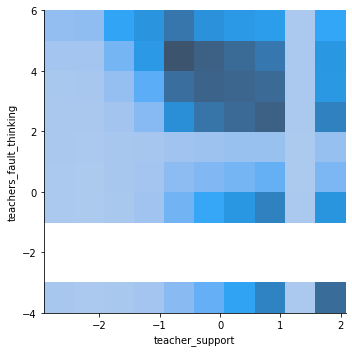

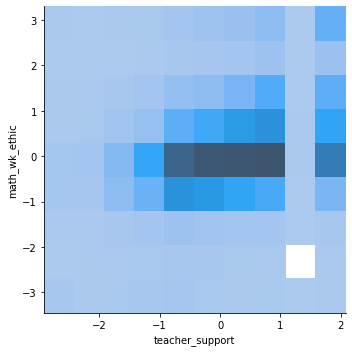

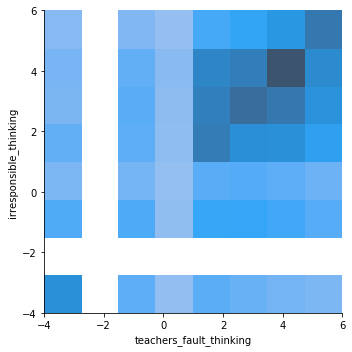

In [35]:
Numeric_relation_pairs = [['teacher_support','teachers_fault_thinking',[0.5, 1]],
                         ['teacher_support','math_wk_ethic',[0.5, 0.75]],
                          ['teachers_fault_thinking','irresponsible_thinking',[1.25, 1.25]]]

for Numeric_relation_pair in Numeric_relation_pairs:
    sb.displot(df, x=Numeric_relation_pair[0], y=Numeric_relation_pair[1],
               binwidth=Numeric_relation_pair[2])

### Teacher Support versus Students feeling its the Teacher Faults
* as expected there is a relation between Increasing in students feeling that was the teacher fault and the decrease in teacher's support

### Math work ethic versus Teacher Support
* linear but a bit positive relation between work ethic vs teacher support

### Irresponsiblitu versus Students feeling its the Teacher Faults
* students that are irresponsible are more likely to say its the teacher fault too

<br><br><br>
I'm now interested in(Teacher Support and Students feeling its the Teacher Faults)

let's see the relations between those and other features

In [36]:
temp = family.copy()
temp.append('siblings')
against_lists = [temp]+ [works_status]
print(against_lists)

[['father', 'mother', 'brothers', 'sisters', 'siblings'], ['father_wk_st', 'mother_wk_st']]


In [37]:
print(against_lists)

[['father', 'mother', 'brothers', 'sisters', 'siblings'], ['father_wk_st', 'mother_wk_st']]


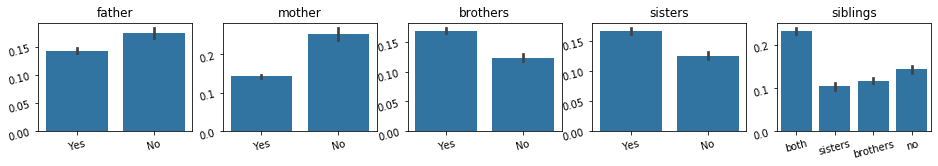

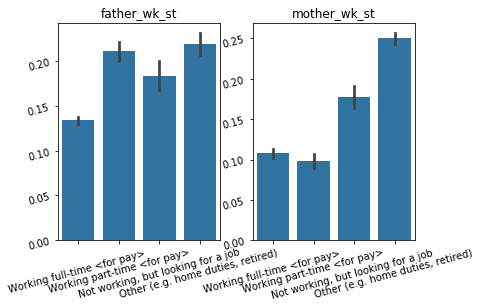

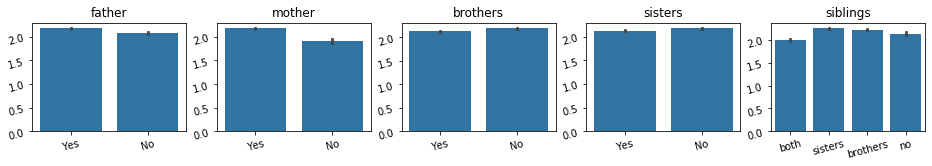

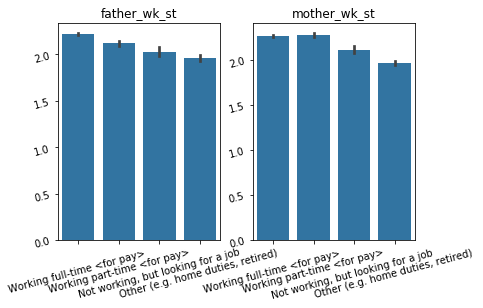

In [38]:
Teachers_features = ['teacher_support','teachers_fault_thinking']
against_lists



for Teachers_feature in Teachers_features:
    for against_list in against_lists:
        fig, ax = plt.subplots(ncols=len(against_list), figsize = [16*len(against_list)/5, 16/3 - 2/3*len(against_list)])
        for index, item in enumerate(against_list):
            sb.barplot(data=df, x=item, y=Teachers_feature, ax = ax[index], color=color)
            ax[index].set_xlabel('')
            ax[index].set_ylabel('')
            ax[index].set_title(item)
            ax[index].tick_params(labelrotation=15)

### Teacher Support
###### after looking at the Pisa dictionary, I found that the teacher support is a score students give to teachers through multiple questions that indicate how much the teacher was supporting them.

* for the family status, nothing huge happens except if the mother is not their, student appeared to have more support from their teachers(from there pov), that's ok
* But, when the mother is there and she has her time for the students the teacher support increases also.
    * (mother) have weird relation with all of the traits, we will discuss this later. 
 
* for the father working part-time or no working at all made the students have more teacher support.

##### from the two findings students that have more support from their parents might be more active at school, which might also make them give teachers more credit. 
##### but in the mother absence case students act different in all cases unexpected, we saw math work ethics increases with no mother, and here also teacher support increases

### Teachers Fault
* nothing to see here

<hr>

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

### (Work ethic)

Work ethic is a score that summarizes student's answers regarding the effort they do on studying math, like home-work and before exams behaviors, so we can take this as a score of their overall work ethics.

this feature varies with almost everything:
1. gender:
    * girls tend to have more ethical score than boys
    <BR><BR>
2. Family:
    * the absence of father, brothers, and sisters made students have less ethic's score
    * on the other hand, mother's absence made students more have more ethics
    <BR><BR>
3. the working status of parents: 
    * uniformly distribution with a drop in work ethics due to father looking for a job
    * very interesting exponential curve of mother's less working made the students have more ethics(study more)
    <BR><BR>
        
### (Irresponsibility)
1. for the mother's work status we found a peak at (looking for a job).
2. positive relation between Irresponsibility and claiming its teacher's fault

### (School Satisfaction)
* This feature has no relation at all with anything.

### (Socializing)
* mother absence made students less social in school.

### (teacher Support vs Teacher's Fault)
* we found that the more support student get from the teacher the less he says that it was the teacher fault
        
### (Teacher's Fault vs Irresponsibility)
* as expected Irresponsible students will also say its not my fault and its the teacher, he didn't explain well, or he doesn't offer much support
        
## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

No

## Multivariate Exploration

from the previous analysis, we saw that student's ethics is the most feature affected by all other feature,
in this section I will investigate more with this feature, applying some condition on the selection of what to plot to neglect the null and weird values of column's combinations

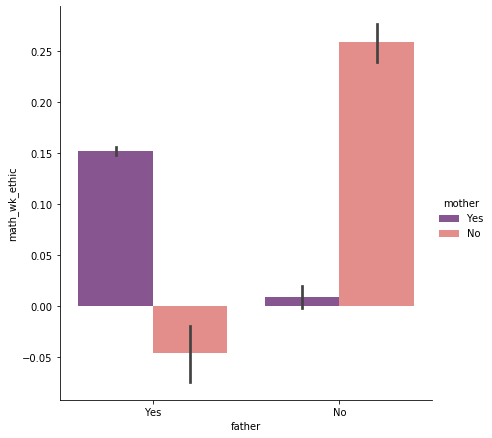

In [39]:
sb.catplot(data=df, kind="bar",
           x="father", y="math_wk_ethic", hue="mother",
           palette="magma", alpha=.8, height=6);

* very interesting values of work ethics, though we saw an increase in mother work ethic here we can see that no mother and a yes for they father created a negative work ethic score, on the other hand, no parents at all made the students more ethical, more than students with two parents.

now let's plot this with gender 

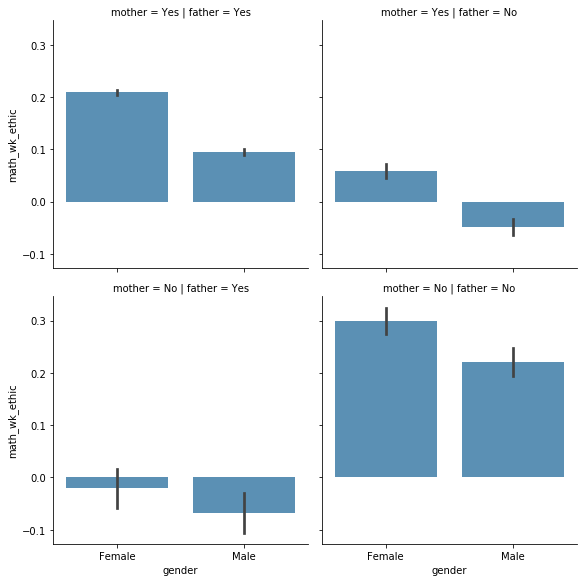

In [40]:
sb.catplot(data=df, kind="bar",
           x="gender", y="math_wk_ethic", row="mother", col='father',
           color=color, alpha=.8, height=4);

* Females overall have more ethics than males, but still same values of std for both in each case.
* males with no father have a negative score compare to females.

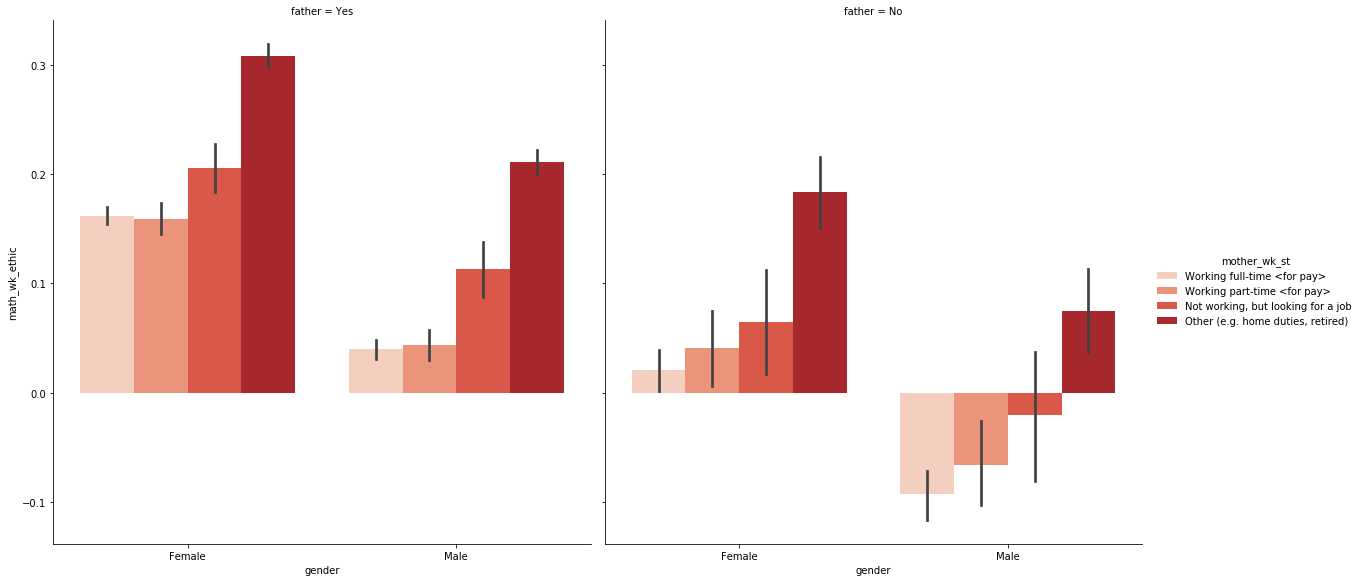

In [41]:
g = sb.catplot(data=df[df['mother'] == 'Yes'], kind="bar",
               x="gender", y="math_wk_ethic", hue="mother_wk_st", col="father",
               palette="Reds", alpha=1, height=8)

here I used a condition for only (yes for mothers) with mother work status because the dataset has values for no mother with work status, so I think selecting mother yes only is better. (I will do the same with father for the next plot)

* here mother always their for students
* We are analyzing the effect of the working status of mothers with gender and father absence on the ethics.
<br><br>
* all plots look kinda the same shape(same exponential shape), with females better than males always.
* females have a positive scale in all cases.
* the highest ethical value will be a female that has a mother in the home with a father too.
* boys with no father will have negative ethics unless their mother is in the home not working(high std in the Not working, but looking for a job), this is the only case that a boy with no father will have a postive working ethics.

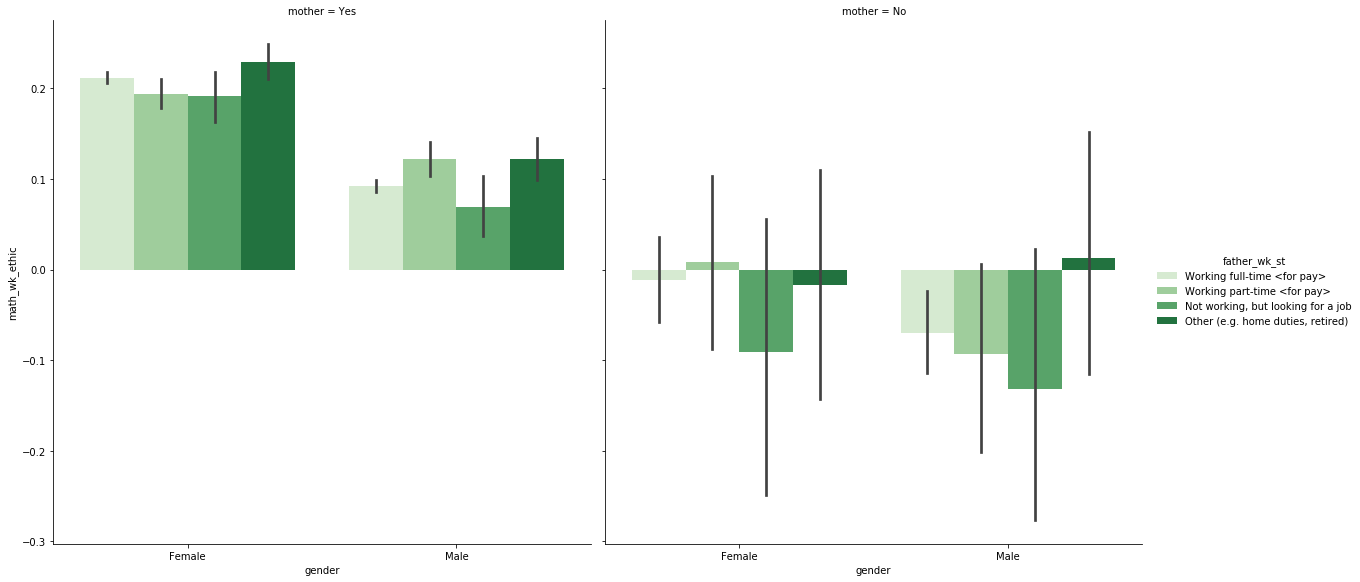

In [42]:
g = sb.catplot(data=df[df['father'] == 'Yes'], kind="bar",
               x="gender", y="math_wk_ethic", hue="father_wk_st", col='mother',
               palette="Greens", alpha=1, height=8)

* here father always there for students.
* We are analyzing the effect of the working status of fathers with gender and mother absence on the ethics.
<br><br>
* with the mother being there for students father work status doesn't matter much, also females better than males.
* a female with a mother always has a higher ethical score than any other male.
* when no mother values start to vary so much(high std), males have worse cases than females though, but a male with a father at home might have a chance to have a high ethical score.
<br><br>

## A final note for ethics

* Students without parents will have higher ethics than all the above cases, that's can be unintuitive and weird.
* we see the decrease in both the absence of father and mother one each case, it's better if both are here especially for males, but when neither of them is there, we should ask why students behave like that:
    * Why they become more valuable students and (we can predict) better workers in the future?
    * What is thier famliy condition now? (relatives/adoption/grandparents)
    * Are they afraid of a rough life knowing that there is no family to support them?
    * Are there raising families to support them and take good care of them more than usual?

now lets do the same with teacher's support

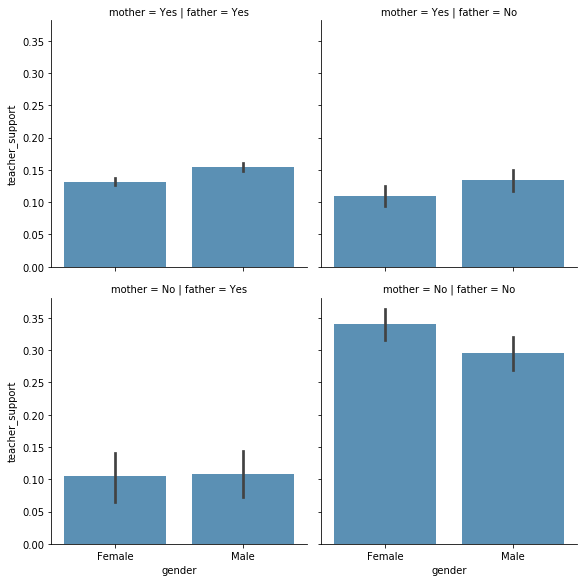

In [43]:
sb.catplot(data=df, kind="bar",
           x="gender", y="teacher_support", row="mother", col='father',
           color=color, alpha=.8, height=4);

* a huge increase in student's teacher support score with no parents
* in most cases males will have a better score, except the case with no parents, females have a higher score than males

let's do the same as before with mother and father work status

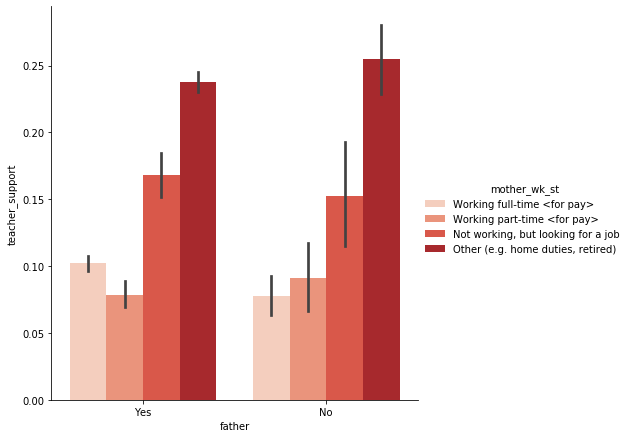

In [44]:
sb.catplot(data=df[df['mother'] == 'Yes'], kind="bar",
           x="father", y="teacher_support", hue="mother_wk_st",
           palette="Reds", alpha=1, height=6);

* nothing here to notice almost identical

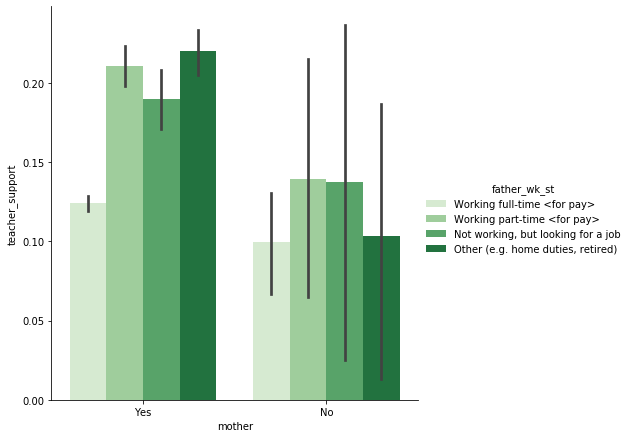

In [45]:
sb.catplot(data=df[df['father'] == 'Yes'], kind="bar",
           x="mother", y="teacher_support", hue="father_wk_st",
           palette="Greens", alpha=1, height=6);

* with no mother, the teacher support score will drop about half, and also the std increases which indicates that we can't be sure with this anymore.

## other features just to be sure

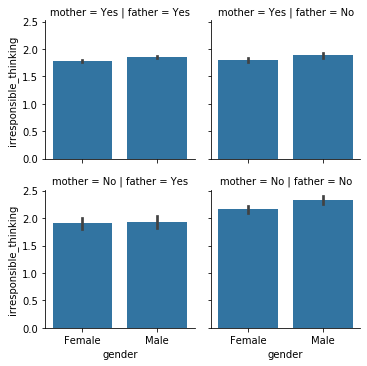

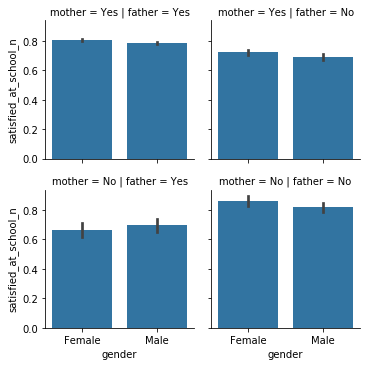

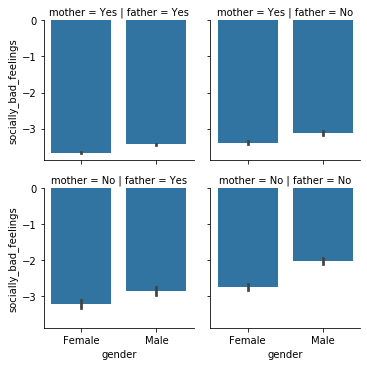

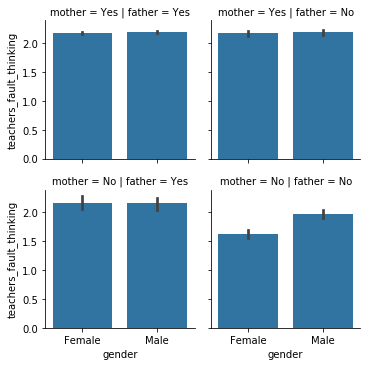

In [46]:
values = ['irresponsible_thinking',
          'satisfied_at_school_n',
          'socially_bad_feelings',
          'teachers_fault_thinking']

for index, value in enumerate(values):
    sb.catplot(data=df, kind="bar",
               x="gender", y=value, row="mother", col='father', color=color, height=2.5);

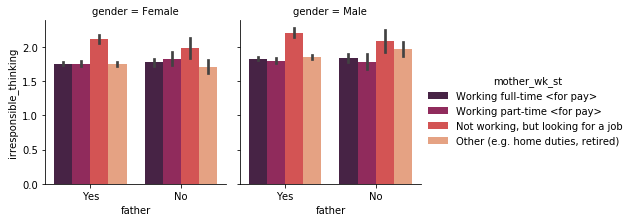

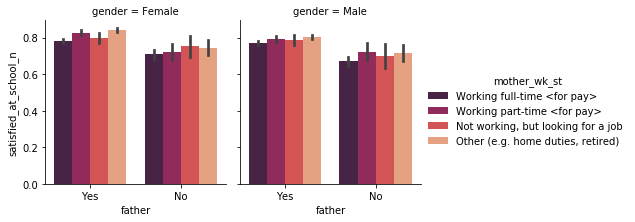

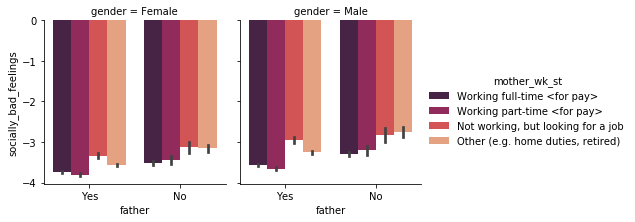

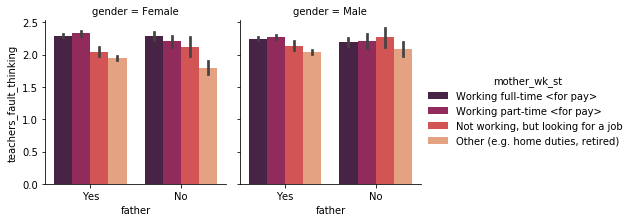

In [47]:
for value in values:
    sb.catplot(data=df[df['mother'] == 'Yes'], kind="bar",
               x="father", y=value, hue="mother_wk_st", col='gender',
               palette="rocket", height=3);

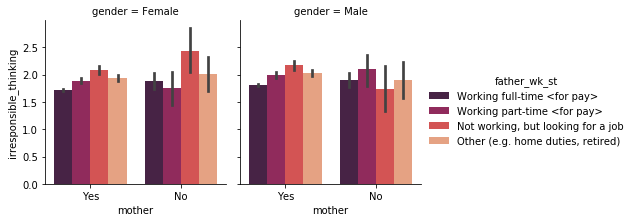

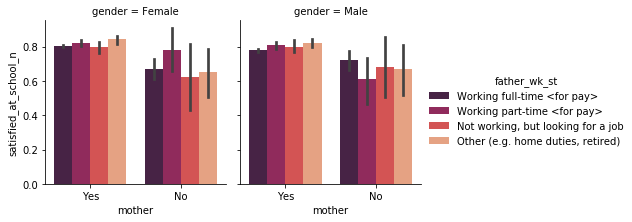

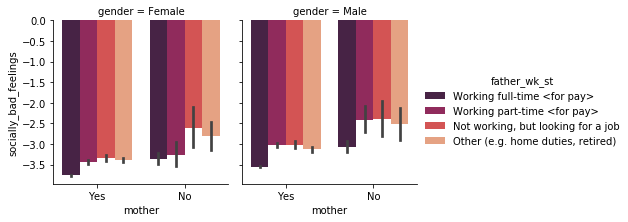

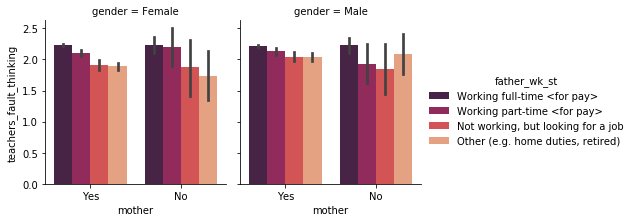

In [48]:
for value in values:
    sb.catplot(data=df[df['father'] == 'Yes'], kind="bar",
               x="mother", y=value, hue="father_wk_st", col='gender',
               palette="rocket", height=3);

* nothing interesting as expected all values are very close or have a bigger std.

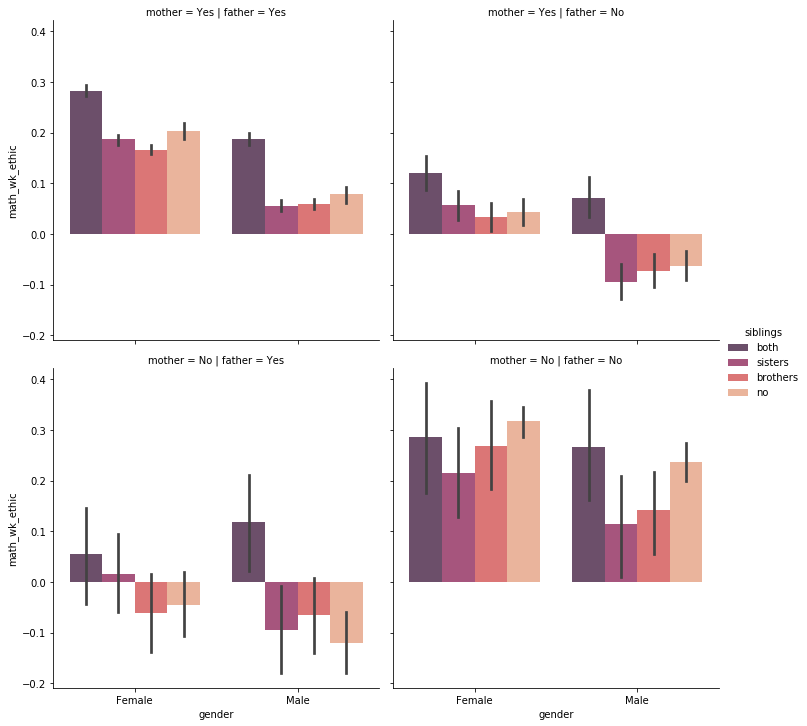

In [50]:
g = sb.catplot(data=df, kind="bar",
           x="gender", y="math_wk_ethic", hue="siblings", col='father', row='mother',
           palette="rocket", alpha=.8, height=5);
g.savefig('Sample2.png', bbox_inches='tight')

I was interested in the relation of siblings with parents but when mother not there it has a high std and follow the same shapes excepected from it so I will not investigate further with siblings

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

* family relations with gender, especially father and mother absence with there work ethics appeared to have different effects on the students work ethics 
* the absence of both parents have a huge impact both on teacher support and work ethics that raises many questions
* other weak features remain weak as it is.

### Were there any interesting or surprising interactions between features?

* no